# Lab01: Linear Regression.

- Student ID: 21127619
- Student name: Phạm Gia Tuấn Khải

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be yours*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Rename your notebook with `ID.ipynb` (for example, if your ID is 1234567, rename your notebook with `1234567.ipynb`) and submit it on moodle.

**Contents:**

- Linear Regression.

### 1. The hypothesis set

- Linear regression is a **linear** model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).
- Generally, a linear model will make predictions by calculating a weighted sum of the input features (independent variables). 
$$ \hat{y}=w_0+w_1x_1+w_2x_2+...+w_nx_n $$

- $\hat{y}$ is the predicted value.

- $n$ is the number of features.

- $x_i$ is the $i^{th}$ feature value.

- $w_j$ is the $j^{th}$ model parameter (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n)$.

$$\hat{y}=h_{\mathbf{w}}\left(\mathbf{x}\right)=\mathbf{w}^{T}\cdot\mathbf{x}$$

- $\mathbf{w}$ is the model **parameter vector** (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n$).

- $\mathbf{w}^T$ is a transpose  of $\mathbf{w}$ (a row vector insteade of column vector).

- $\mathbf{x}$ is the instance's **feature vector**, *containing* $x_0$ to $x_n$, with $x_0$ *always equal to* 1.

- $\mathbf{w}^{T}\cdot\mathbf{x}$ is the dot product of $\mathbf{w}^T$ and $\mathbf{x}$.

- $h_{\mathbf{w}}$ is the hypothesis function, using the parameters $\mathbf{w}$.

![Bias](Bias.png)

### 2. Performance measure and the learning goal

- Before we start to train the model, we need to determine how good the model fits the training data. There are a couple of ways to determine the level of quality, but we are going to use the most popular one and that is the **MSE** (Mean Square Error). We need to find the value for $\mathbf{w}$ that will minimize the MSE:
$$\mathbf{w}=\arg\min MSE_{\mathcal{D}_{train}}$$


- MSE on the train set $\mathcal{D}_{train}$ denoted as $\left(\mathbf{X},\mathbf{y}\right)$ including m samples $\left\{\left(\mathbf{x}_1,y_1\right),\left(\mathbf{x}_2,y_2\right),...\left(\mathbf{x}_m,y_m\right)\right\}$

$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\sum_{i=1}^{m}\left(\mathbf{w}^T\cdot\mathbf{x}_i - y_i\right )^2$$
$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\Vert\mathbf{X}\mathbf{w}-\mathbf{y}\Vert^2$$

Example below is a plot of an MSE function where the true target value is 100, and the predicted values range between -10,000 to 10,000. The MSE loss (Y-axis) reaches its minimum value at prediction (X-axis) = 100. The range is 0 to ∞.

![Plot of MSE Loss (Y-axis) vs. Predictions (X-axis)](MSE.png)

- To find the value of $\mathbf{w}$ that minimizes the MSE cost function, the most common way (*we have known since high school*) is to solve the derivative (gradient) equation. 
$$\mathbf{\hat{w}}=\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}  \mathbf{X}^T  \mathbf{y}$$
  - $\mathbf{\hat{w}}$ is the value of $\mathbf{w}$ that minimizes the cost function
  - **Notice that** $\mathbf{X}^T  \mathbf{X}$ is not always invertible. $\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}$ is pseudo-inverse of $\left(\mathbf{X}^T \mathbf{X}\right)$ - a general case of inverse when the matrix is not invertible or not even square.

### 3. Implementation 

#### Import Library

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.datasets as datasets
%matplotlib inline

#### Create data

In [11]:
X,y=datasets.make_regression(n_samples=100,n_features=1, noise=5)

#### Load and visualize data

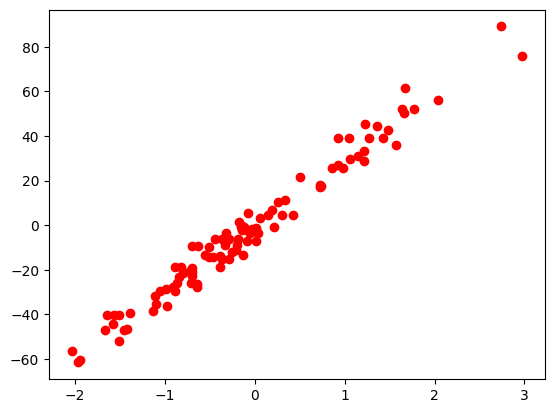

In [12]:
# Visualize data 
plt.plot(X, y, 'ro')
plt.show()

**TODO:** 

- Your observation about data: In hindsight, the data points seem to gather in a somewhat straight "line", indicating that they might follow a linear trend. Thus, making linear regression the most intuitive approach in building a model for this data.

#### Training function

In [13]:
def train_linear_regression(X, y):
    '''
    Trains Linear Regression on the dataset (X, y).
    
    Parameters
    ----------
    X : numpy array, shape (m, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    y : numpy array, shape (m, 1)
        The vector of outputs.
    
    Returns
    -------
    w : numpy array, shape (d + 1, 1)
        The vector of parameters of Linear Regression after training.
    '''
    # TODO
    X_ = np.transpose(X)
    X_X = np.linalg.pinv(X_ @ X)
    w = X_X @ X_ @ y
    return w

In [14]:
# Construct one_added_X
# TODO:
sz = np.size(X)
npone = np.ones((sz, 1))
print(npone.shape)
one_added_X = np.append(npone, X, axis = 1)
# First column of one_added_X is all ones (corresponding to x_0).

print ('one_added_X.shape =', one_added_X.shape)
print ('y.shape =', y.shape)


(100, 1)
one_added_X.shape = (100, 2)
y.shape = (100,)


#### Train our model and visualize result

(2, 1)


(-2.2892632144696523, 3.2286549068812676)

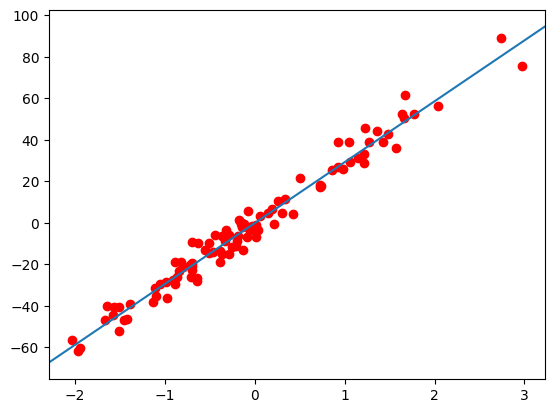

In [15]:
w = train_linear_regression(one_added_X, y)

# Visualize result
predicted_ys = one_added_X.dot(w)

plt.plot(X,y,'ro')

x_min, x_max = plt.xlim()
xs = np.array([x_min, x_max]).reshape(-1, 1)

# Construct one_added_xs
# TODO:
# First column of one_added_xs is all ones (corresponding to x_0).
sz = np.size(xs)
npone = np.ones((sz, 1))
print(npone.shape)
ones_added_xs = np.append(npone, xs, axis = 1)

predicted_ys = ones_added_xs.dot(w)
plt.plot(xs, predicted_ys)
plt.xlim(x_min, x_max)

- **TODO**: Discuss about advantages and disadvantages of `Linear Regression`:

## Advantages:
- It is easy to implement Linear Regression
- The simplicity in the core nature of Linear Regression leads to low time complexity
- In mathematical terms, it is easy to understand the equations used in Linear Regression
## Disadvantages:
- As Linear Regression assumes that there must be a linear relationship between the input and the output, there lies a hindrance in fitting complex datasets correctly
- Outliers in the data can cause a huge issue in the linear relationship between the input and the output
- Over-simplification makes Linear Regression seem unfitting for many of the real-world problems
